[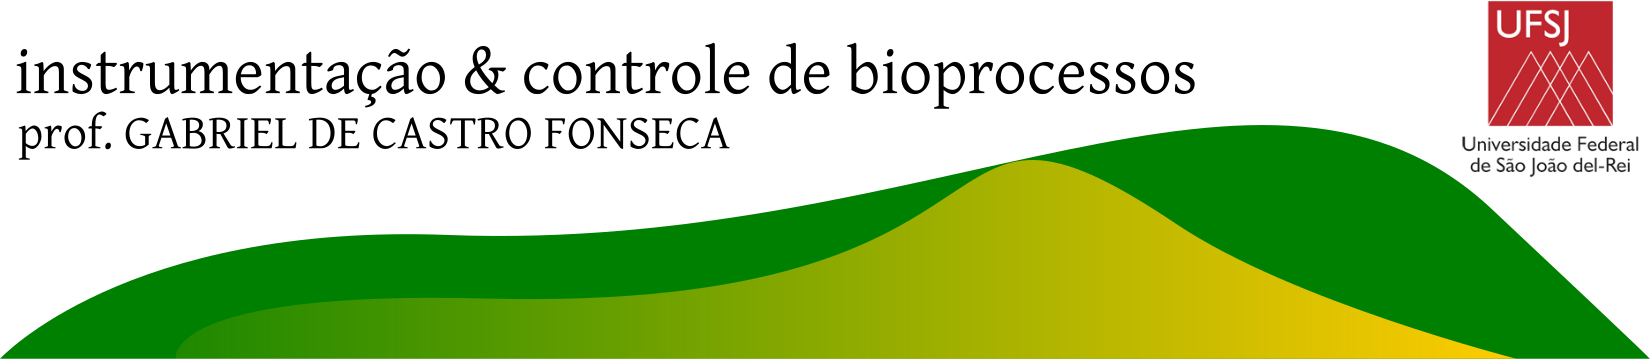](Aulas-Sumário.ipynb)

# Modelagem de Sistemas Dinâmicos
*Prof. Gabriel de Castro Fonseca (DQBIO/UFSJ)*<br>
*Instrumentação e Controle de Bioprocessos*

Este documento é publicado sob os termos da licença [GNU General Public Licence 3.0](https://www.gnu.org/licenses/gpl-3.0.en.html).

## Exemplo: Tanque esvaziado por gravidade

A Figura abaixo mostra um tanque de enchimento. O tanque tem seção transversal com área $A$ constante e nível de líquido $h$ variável. O tanque é alimentado por uma vazão volumétrica $F_0$ na entrada e é drenado pela vazão $F_1$ na saída.

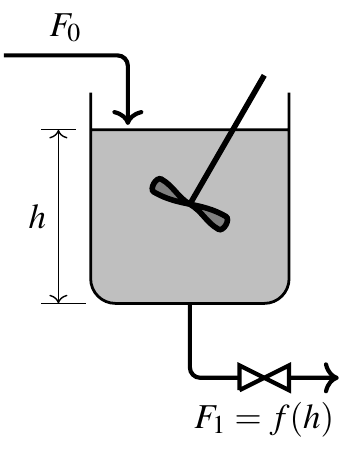

### Balanço material

Se a densidade do líquido é constante durante o processo, o balanço material pode ser representado por

\begin{equation}
    A \frac{dh}{dt} = F_0 - F_1
\end{equation}

A vazão de saída do tanque é proporcional a velocidade de escoamento do fluido, que por sua vez é proporcional à raiz quadrada do nível do tanque. Isso pode ser demonstrado aplicando a [Equação de Bernoulli](https://pt.wikipedia.org/wiki/Equa%C3%A7%C3%A3o_de_Bernoulli):

$$
    gh + \frac{v^2}2 + \frac{p}{\rho} = \text{constante}
$$

Aplicando essa equação à superfície do tanque (altura $h$, velocidade $v\approx 0$) e ao orifício de saída (altura $h=0$, velocidade $v$),

\begin{gather*}
    gh + \frac{p_{atm}}{\rho} = \frac{v^2}2 + \frac{p_{atm}}{\rho} \\
    \implies v = \sqrt{2gh}
\end{gather*}

O valor da vazão de saída, portanto, ser calculado a partir da expressão

\begin{equation}
    F_1 = C_v \sqrt{h}
\end{equation}

Onde $C_v$ é uma parâmetro da válvula que depende da área de escoamento de fluido para uma dada fração de abertura. 

Substituindo no balanço material,

\begin{equation}
    A \frac{dh}{dt} = F_0 - C_v\sqrt{h}
\end{equation}

### Variáveis de processo

Em Controle de Processos é importante classificar as variáveis que aparecem em um modelo conforme as seguintes categorias:
- variável independente: em sistemas dinâmicos, o tempo.
- variável dependente: aquelas que dependem do tempo.
    * variável de estado: aquelas que definem o sistema (geralmente aparecem nas derivadas).
    * estímulo: variável que altera o estado de um sistema.
    * resposta: variável que é consequência do estado do sistema (variáveis de estado também são variáveis resposta).
- parâmetro: constante em relação ao tempo.

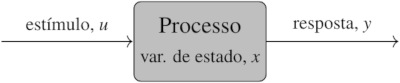

No modelo do tanque, as variáveis dependentes podem ser classificadas como
- $h$: variável de estado, resposta.
- $F_0$: variável estímulo.
- $F_1 = C_v\sqrt{h}$: variável resposta.
- $A$, $C_v$: parâmetros

## Definição do problema

Suponha que a area da seção do tanque valha $A =1 \text{ m}^2$ e a constante da válvula seja $C_v = 0,01 \text{ m}^{2,5}/\text{s}$. O nível do tanque se encontra inicialmente em estado estacionário no valor desejado $h^* = 1 \text{ m}$ para uma vazão de entrada $F_0^* =  10 \text{ L/s}$. Num certo momento $t=0$ a vazão de entrada salta subitamente para $F_0 = 12 \text{ L/s} $. Como o nível de líquido no tanque vai variar em relação ao tempo?

### Linearização

A equação que descreve o comportamento do tanque é não linear, pois ela contém o termo não linear $\sqrt{h}$. A maioria dos modelos de procesoss químicos ou bioprocessos envolve equações não lineares, e na maioria das vezes essas equações não podem ser resolvidas analiticamente.

É possível resolvê-las numericamnete, mas outra alternativa interessante seria [linearizar da equação](https://pt.wikipedia.org/wiki/Lineariza%C3%A7%C3%A3o). Seja uma EDO $\dfrac{dx}{dt} = f(x,u)$ onde $f(x,u)$ é uma função não linear de uma variável de estado $x$ e uma variável estímulo $u$, é possível linearizá-la em torno de um ponto $x^*$ e $u^*$ expandido-a como uma série de Taylor truncada nos termos de derivada primeira.

\begin{equation}
    f(x) \approx f(x^*,u^*) + \left.\frac{{\rm \partial}f}{{\rm \partial}x}\right)_{(x^*,u^*)} \!\!\!\!\!\!\!\!\cdot (x-x^*) + \left.\frac{{\rm \partial}f}{{\rm \partial}u}\right)_{(x^*,u^*)} \!\!\!\!\!\!\!\!\cdot (u-u^*) 
\end{equation}

Se $x^*$ e $u^*$ correspondem a uma situação de equilíbrio do sistema

No nosso exemplo é interessante linearizar a EDO em torno de uma condição de equilíbrio do tanque, isto é, um par de valores $h^*$ e $F_0^*$ para os quais $\dfrac{dh}{dt} = f(h^*,F_0^*) = 0$:

\begin{equation}
    F_0^* = C_v \sqrt{h^*}
\end{equation}

Observe que, como o valor de $C_v$ é fixo, o estado de equilíbrio em $h^*$ só ocorre para um valor muito específico da vazão de entrada $F_0(t) = F_0^*$. Em nosso problema $C_v =$ 0,01 m$^{2,5}$/s e desejamos que o nível de equilíbrio do tanque seja 1 m. O único valor de vazão volumétrica para o qual isso seria possível é 10 L/s (0,01 m$^3$/s). Se a vazão volumétrica sobe para 12 L/s, o nível de equilíbrio se torna 1,44 m. 

O resultado da linearização do balanço material em torno de $h^*$ e $F_0^*$ seria 

\begin{equation}
    A \frac{dh}{dt} = - \frac{C_v}{2\sqrt{h^*}}(h-h^*) + 1\cdot (F_0-F_0^*)
\end{equation}

A diferença entre o valor atual de uma variável e seu valor de equilíbrio é chamada **desvio**. Podemos definir os desvios do nível e da vazão de entrada como $\delta h = h-h^*$ e $\delta F_0 = F_0 - F_0^*$. Observe que como $h^*$ é uma constante, $\frac{dh}{dt} = \frac{d}{dt}\delta h$. Assim, a equação linearizada fica

\begin{equation}
    A\frac{d}{dt}\delta h = \delta F_0 - \frac{C_v}{2\sqrt{h^*}} \delta h
\end{equation}

### Solução da equação linearizada

Em controle de processos equações diferenciais de primeira ordem com um estímulo e uma resposta costumam ser escritas na forma padrão

\begin{equation}
    \tau \frac{dy}{dt} + y = Ku
\end{equation}

Onde
* $y$ é o desvio da variável resposta.
* $u$ é o desvio da variável estímulo.
* $\tau$ é a "constante de tempo".
* $K$ é o "ganho estacionário" do processo.

Colocando a equação linearizada na forma padrão teríamos

\begin{equation}
    \underbrace{\left(\frac{2\sqrt{h^*}A}{C_v}\right)}_\tau\underbrace{\frac{d}{dt}\delta h}_{\frac{dy}{dt}} +  \underbrace{\delta h}_y = \underbrace{\left(\frac{2\sqrt{h^*}}{C_v}\right)}_K\underbrace{\delta F_0}_u
\end{equation}

Substituindo os valores numéricos teríamos $\tau = 200 \text{ s}$ e $K = 200 \text{ s/m}^2$. O desvio no nível é desconhecido e o desvio na vazão volumétrica vale $u = (12-10) \text{L/s} = 0,002 \text{ m}^3\text{/s} $.

\begin{gather*}
    200 \frac{dy}{dt} + y = 0,4 \\
    \int \frac{dy}{y-0,4} = -\frac{1}{200}\int dt + c \\
    \ln(y-0,4) = - \frac{t}{200} + c \\
    y(t) = 0,4 + C \cdot e^{-t/200}
\end{gather*}

A constante de integração pode ser eliminada substituindo-se a condição inicial $y(0) = 0$, isto é no momento em que ocorreu o desvio na vazão volumétrica (estímulo), o nível do tanque se encontrava no valor desejado (desvio nulo).

\begin{equation}
    y(t) = 0,4\left(1-e^{-t/200}\right)
\end{equation}

Como $y(t) = \delta h = h - h^*$ o nível do tanque será dado por

\begin{equation}
    h(t) = 1 + 0,4\left(1-e^{-t/200}\right)
\end{equation}

Tomando o limite quando o tempo tende a infinito, pode-se concluir que o valor final do nível do tanque após o aumento na vazão de entrada será 1,4 m.

### Solução linearizada × Solução não linear

A equação diferencial linearizada e a equação não linear são diferentes entre si. A solução que encontraríamos resolvendo a EDO não linear original obviamente não seria idêntica à solução linear. A vantagem da equação linearizada é que ela sempre pode ser resolvida de forma analítica, ou seja, podemos escrever uma fórmula para a solução e tirar conclusões sobre como cada parâmetro afeta o comportamento do sistema.

A desvantagem da linearização é que ela só é uma boa aproximação para o sistema real (não linear) quando o estado do sistema (neste caso o nível do tanque, $h$) está muito próximo do valor de equilíbrio escolhido como referência para a linearização. Geralmente isso não é um grande problema em Controle de Processos porque o objetivo de um sistema de controle é exatamente garantir que as variáveis de estado não se desviem excessivamente dos valores desejados.

A solução da equação não linear está demonstrada numericamente abaixo com a linguagem de programação Python. Você não precisa compreender o programa ou mesmo tentar lê-lo para acompanhar o conteúdo!

A solução não linear e a linearizada podem ser comparadas interativamente deslizando-se a barra de controle da vazão $F_0$ localizada após o código abaixo.

Observe que para variações pequenas em relação à vazão de equilíbrio $F_0^* = 10 \text{ L/s}$, a solução linearizada fica muito próxima da solução não linear, mas para variações maiores essa aproximação se torna inadequada.

In [2]:
%matplotlib inline

# Carregamento de pacotes
import numpy as np 
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import ipywidgets as widgets

# Definição da EDO não linear
def fnlin(t,x,u):
    """ Lado direito da EDO não linear. """
    return u/1000 - 0.01 * np.sqrt(max(x,0))

# Solução analítica da função linearizada
def slin(t,u):
    """ Solução da equação linearizada. """
    return 1 + 0.2*(u-10)*( 1 - np.exp(-t/200) )

# Construção do gráfico
def graf(t,y,z):
    """ Plota e configura gráfico com soluções. """
    plt.rcParams["figure.figsize"]=[9,6]
    plt.rcParams.update({'font.size': 14})
    plt.plot(t,y,t,z)
    plt.xlim([0,1600])
    #plt.ylim([0,4])
    plt.ylabel("Nível de líquido, $h$ (m)")
    plt.xlabel("Tempo, $t$ (s)")
    plt.grid();
    plt.legend(["não linear","linearizada"], loc="best")

# Função principal, solução da EDO
def sol(u):
    t  = np.linspace(0,2500,101) # vetor de tempos
    y0 = 1 # condição inicial: nível = 1 m
    y = odeint(fnlin,y0,t,args=(u,),tfirst=True).T[0] # solução da EDO
    z = slin(t,u) # solução linearizada
    print(f"\tNível final (não linear): {y[-1]:3.2f} m.\n\tNível final (linearizado): {z[-1]:3.2f} m.") 
        # Imprime valores em t=2000 s
    graf(t,y,z)
    
# Barra deslizante interativa
print("\t Vazão de entrada em L/s:")
w = widgets.interact(sol,u=widgets.IntSlider(min=-0,max=20,step=1,value=10,
                     continuous_update=False,description=r'$F_0$'));
w.widget.children[-1].layout.height = '500px'

	 Vazão de entrada em L/s:


interactive(children=(IntSlider(value=10, continuous_update=False, description='$F_0$', max=20), Output()), _d…

## Exercício: Linearização de reator enzimático

A fórmula geral para a linearização de uma EDO não linear $\dfrac{dx}{dt} = f(x,t)$ em torno de um estado de equilíbrio $(x^*,u^*)$ pode ser representada como 

\begin{equation}
    \frac{d}{dt}\delta x = \left.\frac{{\rm \partial}f}{{\rm \partial}x}\right)_{(x^*,u^*)} \!\!\!\!\!\!\cdot \delta x + \left.\frac{{\rm \partial}f}{{\rm \partial}u}\right)_{(x^*,u^*)} \!\!\!\!\!\!\cdot \delta u
\end{equation}

Considere que a concentração de substrato em um reator enzimático bem misturado pode ser modelado pela equação pela equação

\begin{equation}
    \frac{dS}{dt} = \frac{F_0}{V}(S_0-S) - \frac{r_{max} S}{K_m + S}
\end{equation}

Linearize essa equação diferencial e escreva-a na forma padrão ($\tau \frac{dy}{dt} + y = Ku$) considerando que:
* $S$ é a variável resposta, $S^* = 1$, $y = \delta S$;
* $S_0$ é a variável estímulo, $S_0^* = 11$, $u = \delta S_0$;
* $F_0 = 0,06$, $V=3$, $r_{max} = 0,24$ e $K_m=0,2$ são parâmetros.

### Solução:

Para resolver o problema, você deve derivar o lado direito da equação diferencial em relação a $S_0$ e a $S$ e calcular o resultado das derivadas considerando $S_0=S_0^*$ e $S=S^*$.

Na prática, você só precisa derivar realmente os termos não lineares. Nos termos lineares basta substituir $S_0$ por $u = \delta S_0$ e $S$ por $y = \delta S$.

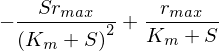

In [5]:
import sympy as sym # importação de pacote de matemática simbólica
sym.init_printing() # imprime as fórmulas calculadas com formato LaTeX

S, rm, Km = sym.symbols('S r_max K_m') # definição de símbolos
eq = rm*S/(Km+S) # definição da equação

sym.diff( eq, S ) # derivação

\begin{gather*}
    \frac{d}{dt} \delta S = \frac{F_0}{V}\delta S_0 - \left[ \frac{F_0}{V} - \frac{r_{max} S^*}{(K_m+S^{*})^2} + \frac{r_{max}}{K_m+S^*}\right] \delta S \\
\end{gather*}

In [25]:
F0 = 0.06
V  = 3
rm = 0.24
Km = 0.2
S  = 1
S0 = 11

expr = F0/V - rm*S/(Km+S)**2 + rm/(Km+S)

print(f"{1/expr:4.2f}dy/dt + y = {F0/V/expr:5.3f}u")

18.75dy/dt + y = 0.375u


\begin{gather*}
    18,75 \frac{dy}{dt} + y = 0,375 u
\end{gather*}

## Bibliografia

* C.A. Kluever (2018). Sistemas Dinâmicos: Modelagem, Simulação e Controle. LTC. Capítulos 1, 4 e 5.
* B.W. Bequette. (2003). Process Control: Modeling, Design and Simulation. PHI Learning. Capítulo 2.
* C. Garcia (2017). Controle de Processos Industriais: Estratégias Convencionais. Volume 1, Blucher. Capítulo 3.
* C.A. Smith, A. Corripio (2008). Princípios e Prática do Controle Automático de Processo. 3 a ed. LTC. Capítulos 2 e 3.
* J.C. Kantor (2019). [CBE 30338 Chemical Process Control](http://jckantor.github.io/CBE30338/). Capítulos 2 e 3.